# Kuramoto Order Parameter

In [1]:
# imports first! just the usual
import numpy as np
from scipy import integrate
import scipy.stats
import scipy.signal
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time

## How to assess synchrony

At any given moment, how synchronized are the oscillations? This question is relatively simple to answer if we know the phase of each oscillator and by "synchronized", we mean "similar in phase". Chronobiologists frequently plot their phase data with each point on the unit circle. A vector is drawn from the center of the circle at the average phase angle. Its length reflects how similar the phases are. Typically, this is called a Rayleigh plot (though this is not the term Steven Strogatz uses in the figure I show below)

<div style="max-width:200px;margin-left: auto; margin-right: auto;">

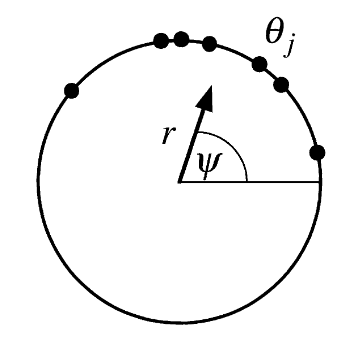
</div>

The length of this vector in the plot is $r$ and is referred to either as the Kuramoto order parameter, the order parameter, or the sync index. It is calculated according to:


$$ r e^{i\psi} = \frac{1}{N}\sum_{j=1}^{N}e^{i\theta_j} $$

where $\psi$ is the average phase.

*Reference*

Strogatz, S. H. From Kuramoto to Crawford: Exploring the onset of synchronization in populations of coupled oscillators. Physica D: Nonlinear Phenomena 143, 1–20 (2000).


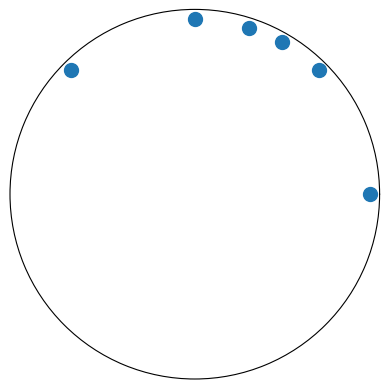

In [2]:
phases = np.array([0, np.pi/3, np.pi/4, np.pi/2, 1.5*np.pi/2, 0.8*np.pi/2])
plt.polar( phases, np.ones(phases.shape), 'o', markersize=10);
ax = plt.gca()
ax.set_rticks([])
ax.set_rmax(1.003)
ax.set_xticks([]);

In [3]:
# Given an array of phases (in radians),
# return the mean phase, using circular statistics
# The formula is given on Wikipedia's page for the circular mean
# (https://en.wikipedia.org/wiki/Circular_mean)
# The chief references for circular statistics is a book: 
# Jammalamadaka, S. Rao and SenGupta, A. (2001). Topics in Circular Statistics, 
#      Section 1.3, World Scientific Press, Singapore. ISBN 981-02-3778-2
def circ_mean(phases):
    C = np.mean( np.cos(phases ) )
    S = np.mean( np.sin(phases) )
    angle = np.arctan2( S, C )
    return angle

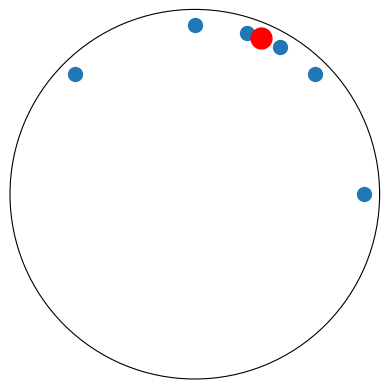

In [4]:
phases = np.array([0, np.pi/3, np.pi/4, np.pi/2, 1.5*np.pi/2, 0.8*np.pi/2])
mphi = circ_mean(phases)


plt.polar( phases, np.ones(phases.shape), 'o', markersize=10);
plt.polar( [mphi], [1], 'o', color='red', markersize=15)
ax = plt.gca()
ax.set_rticks([])
ax.set_rmax(1.005)
ax.set_xticks([]);


In [5]:
def orderParameter( phases ):
    z = np.mean( np.exp(1j*phases))
    r = np.abs(z)
    return r

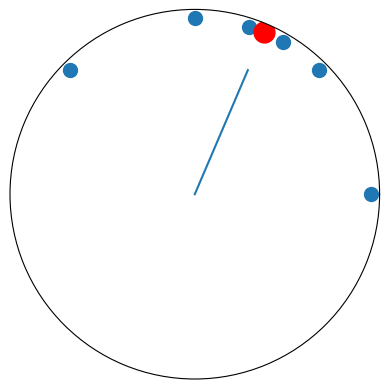

In [6]:
phases = np.array([0, np.pi/3, np.pi/4, np.pi/2, 1.5*np.pi/2, 0.8*np.pi/2])
plt.polar( phases, np.ones(phases.shape), 'o', markersize=10);
mphi = circ_mean(phases)
R = orderParameter(phases)
plt.polar( [mphi], [1], 'o', color='red', markersize=15)
plt.polar( [mphi, mphi], [0, R], color='C0');
ax = plt.gca()
ax.set_rticks([])
ax.set_rmax(1.05)
ax.set_xticks([]);


In [8]:
R

0.7669637820248295

In [9]:
N = 36
VIP_strength = 0.25
AVP_strength = 0
VIP_duration = 7 * np.pi/10
VIPconn = VIP_conn_v2( N, VIP_strength )
AVPconn = AVP_conn_v1( N, AVP_strength )
light_fn = DD


end_time = 240
dt = 0.1
ts = np.arange(0,end_time,dt)
ps0 = np.zeros( (N,) )
pobj = Parameters_VipAVPLight( N, VIPconn = VIPconn, AVPconn = AVPconn, 
                              VIP_duration=VIP_duration, light_fn = light_fn )
model = lambda t,ps: model_vip_avp_light_v1( t, ps, pobj )
b = time.time()
sol = integrate.solve_ivp( fun = model, t_span = (0, end_time), y0=ps0, method="LSODA", t_eval = ts, max_step=0.01 )
dur = time.time() - b
print( f"took {dur} seconds to simulate" )

print(sol)

# phases = np.array([0, np.pi/3, np.pi/4, np.pi/2, 1.5*np.pi/2, 0.8*np.pi/2])
# plt.polar( phases, np.ones(phases.shape), 'o', markersize=10);
# mphi = circ_mean(phases)
# R = orderParameter(phases)
# plt.polar( [mphi], [1], 'o', color='red', markersize=15)
# plt.polar( [mphi, mphi], [0, R], color='C0');
# ax = plt.gca()
# ax.set_rticks([])
# ax.set_rmax(1.05)
# ax.set_xticks([]);

NameError: name 'VIP_conn_v2' is not defined